### My dataset is provided by GE company. I will be performing logitics regression to predict the outcome variable malicious, either Yes or No which is a binary variable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

## Data Exploration 

In [ ]:
#load csv files
alert_by_indi = pd.read_csv('alerts_by_indicators.csv')
alert_by_pair = pd.read_csv('alerts_by_pairs.csv')
demo_gra = pd.read_csv('demographics (4).csv' , encoding='latin-1')
heat_score = pd.read_csv('heat_scores.csv')
main_table = pd.read_csv('processed_alerts_obfuscated_summer_2019.csv')
#merge tables ()
main_table_heat_score = pd.merge(main_table,heat_score,left_on='INDICATORS',right_on='SHARED_INDICATION_NAME',how='left')
main_table_heat_score_demo_gra = pd.merge(main_table_heat_score,demo_gra,on='EMPLOYEE_ID',how='left')
main_table_heat_score_demo_gra.to_csv('ALY6980_merged_data.csv',index='false')

In [2]:
GE= pd.read_csv('ALY6980_merged_data.csv')
GE.head(10)

,Unnamed: 0,TYPE_NAME,ALERT_ESCALATION_DATE,ALERT_ID_FK,INSERT_DATE,SCORE,STATUS,RESOLUTION,OWNER_NAME,MALICIOUS,...,DIVISION_NAME,BUSINESS_SEGMENT,INDUSTRY_FOCUS_NAME,GE_HIRE_DATE,LOCATION_NAME,CITY,STATE_NAME,COUNTRY_NAME,COUNTRY,FUNCTION_GROUP
0,0,TP,3/26/18,3.195298e+08,9/29/17,180,cleared,closed,Senior_Analyst_1,yes,...,AVI SC-Chief Manufacturing Engineering,Aviation Supply Chain,GE Aviation,11/13/07 0:00,Evendale OH US,Evendale,Ohio,United States,US,Production
1,1,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2,West Chester,Ohio,United States,US,Production
2,2,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2,West Chester,Ohio,United States,US,Production
3,3,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2,West Chester,Ohio,United States,US,Production
4,4,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2,West Chester,Ohio,United States,US,Production
5,5,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2,West Chester,Ohio,United States,US,Production
6,6,TP,3/26/18,1.134030e+09,9/29/17,873,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-Military Propulsion & Power Engineering,Aviation Engineering,GE Aviation,7/16/07 0:00,Lynn (GET) MA US,Lynn,Massachusetts,United States,US,Production
7,7,TP,3/26/18,8.153652e+08,9/29/17,811,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-Advanced Military Engineering,Aviation Engineering,GE Aviation,1/10/06 0:00,Evendale OH US,Evendale,Ohio,United States,US,Production
8,8,TP,3/26/18,8.153652e+08,9/29/17,811,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-Advanced Military Engineering,Aviation Engineering,GE Aviation,1/10/06 0:00,Evendale OH US,Evendale,Ohio,United States,US,Production
9,9,TP,3/26/18,8.153652e+08,9/29/17,811,cleared,closed,Senior_Analyst_1,yes,...,AVI ENG-Advanced Military Engineering,Aviation Engineering,GE Aviation,1/10/06 0:00,Evendale OH US,Evendale,Ohio,United States,US,Production


In [3]:
print('Number of samples:',len(GE))

Number of samples: 186558


In [4]:
GE.info()  #quick overview of the data(number of columns, variable type and non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186558 entries, 0 to 186557
Data columns (total 45 columns):
Unnamed: 0                      186558 non-null int64
TYPE_NAME                       186558 non-null object
ALERT_ESCALATION_DATE           186558 non-null object
ALERT_ID_FK                     178743 non-null float64
INSERT_DATE                     186558 non-null object
SCORE                           186558 non-null int64
STATUS                          186558 non-null object
RESOLUTION                      186558 non-null object
OWNER_NAME                      186558 non-null object
MALICIOUS                       186558 non-null object
EMPLOYEE_ID                     186558 non-null int64
RISK_FACTOR                     96377 non-null float64
AVG_SCORE                       96377 non-null float64
CLASSIFICATION                  186558 non-null object
HRU                             186558 non-null object
INDICATORS                      186558 non-null object
INDICATOR_P

In [5]:
 # count the number of rows for malicious column
GE.groupby('MALICIOUS').size()

MALICIOUS
no          71921
unknown         2
yes        114635
dtype: int64

In [6]:
GE = GE.drop(GE["MALICIOUS"][GE["MALICIOUS"] == "unknown"].index)
print(len(GE))

186556


#### Now let's define an output variable for our binary classification. Here we will be predicting if a heat alert is malicious or non malicious.

In [7]:
# define output label
GE.loc[GE['MALICIOUS']=='no','MALICIOUS']=0
GE.loc[GE['MALICIOUS']=='yes','MALICIOUS']=1

GE['OUTPUT_LABEL'] = (GE['MALICIOUS']).astype('int') 


In [8]:
GE['MALICIOUS']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        0
16        0
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        0
25        0
26        0
27        0
28        1
29        1
         ..
186528    1
186529    1
186530    1
186531    1
186532    1
186533    1
186534    1
186535    1
186536    1
186537    1
186538    1
186539    1
186540    1
186541    1
186542    1
186543    1
186544    1
186545    1
186546    1
186547    1
186548    1
186549    1
186550    1
186551    1
186552    1
186553    1
186554    1
186555    1
186556    1
186557    1
Name: MALICIOUS, Length: 186556, dtype: int64

In [9]:
# let's define a function to calculate the prevalence of events that malicious alerts happened
#while defining the function, delete two unknown records that we are not interested in. 
def calc_prevalence(y_actual):
    return ((sum(y_actual)-4)/len(y_actual))

In [10]:
print('Prevalence:%.3f'%calc_prevalence(GE['MALICIOUS'].values))

Prevalence:0.614


#### About 61.4% of the overall records are malicious records.  

In [11]:
print('Number of columns:', len(GE.columns))

Number of columns: 46


In [12]:
GE[list(GE.columns)[0:10]].head()

,Unnamed: 0,TYPE_NAME,ALERT_ESCALATION_DATE,ALERT_ID_FK,INSERT_DATE,SCORE,STATUS,RESOLUTION,OWNER_NAME,MALICIOUS
0,0,TP,3/26/18,3.195298e+08,9/29/17,180,cleared,closed,Senior_Analyst_1,1
1,1,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,1
2,2,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,1
3,3,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,1
4,4,TP,3/26/18,1.633243e+09,9/29/17,172,cleared,closed,Senior_Analyst_1,1


In [13]:
GE[list(GE.columns)[10:20]].head()

,EMPLOYEE_ID,RISK_FACTOR,AVG_SCORE,CLASSIFICATION,HRU,INDICATORS,INDICATOR_PAIRS,ALERT_CATEGORY,ALERT_TYPE,GROUPING
0,2313834724,1.80,100.0,TP/DE,None,App_1_Heat_Box_PRE_2016_Q3,App_1_Heat_Box_PRE_2016_Q3,Heat,Daily_Heat,App_1
1,13152813815,1.72,100.0,TP/DE,HRU11,App_1_Heat_Box_PRE_2016_Q3,App_1_Heat_Box_PRE_2016_Q3/App_11_Threshold_Ac...,Heat,Daily_Heat,App_1
2,13152813815,1.72,100.0,TP/DE,HRU11,App_11_Threshold_Access_30_Day,App_1_Heat_Box_PRE_2016_Q3/App_11_Threshold_Ac...,Heat,Daily_Heat,App_11
3,13152813815,1.72,100.0,TP/DE,HRU11,App_11_Threshold_Access_30_Day,App_1_Heat_Box_PRE_2016_Q3/App_11_Threshold_Ac...,Heat,Daily_Heat,App_11
4,13152813815,1.72,100.0,TP/DE,HRU11,App_11_Threshold_Access_90_Day,App_1_Heat_Box_PRE_2016_Q3/App_11_Threshold_Ac...,Heat,Daily_Heat,App_11


In [14]:
GE[list(GE.columns)[20:30]].head()

,INDICATOR_HEAT_SCORE,SHARED_INDICATION_NAME,SHARED_INDICATOR_APPLICATION,SHARED_INDICATOR_ACTIVITY,SHARED_INDICATOR_TYPE,SHARED_INDICATOR_SUFFIX,HEAT_VALUE,Unnamed: 6,PERSON_TYPE,PERSON_STATUS
0,0.0,App_1_Heat_Box_PRE_2016_Q3,App_1,Box,Heat,PRE_2016_Q3,0.0,NaN,EMPLOYEE,I
1,0.0,App_1_Heat_Box_PRE_2016_Q3,App_1,Box,Heat,PRE_2016_Q3,0.0,NaN,EMPLOYEE,A
2,4.0,App_11_Threshold_Access_30_Day,App_11,Access,Threshold,30_Day,4.0,NaN,EMPLOYEE,A
3,4.0,App_11_Threshold_Access_30_Day,App_11,Access,Threshold,30_Day,4.0,NaN,EMPLOYEE,A
4,3.0,App_11_Threshold_Access_90_Day,App_11,Access,Threshold,90_Day,3.0,NaN,EMPLOYEE,A


In [15]:
GE[list(GE.columns)[30:40]].head()

,DEPARTMENT_NAME,JOB_FUNCTION,JOB_TITLE,CAREER_BAND,LEGAL_ENTITY_NAME,DIVISION_NAME,BUSINESS_SEGMENT,INDUSTRY_FOCUS_NAME,GE_HIRE_DATE,LOCATION_NAME
0,AVI SC-Chief Manufacturing Engineering,Engineering/Technology,Principal Engineer - Chief Engineering,SPB,GENERAL ELECTRIC COMPANY,AVI SC-Chief Manufacturing Engineering,Aviation Supply Chain,GE Aviation,11/13/07 0:00,Evendale OH US
1,AVI ENG-GE9XE-Controls & Configurations,Engineering/Technology,Advanced Lead Engineer - Electronic Hardware,LPB,GENERAL ELECTRIC COMPANY,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2
2,AVI ENG-GE9XE-Controls & Configurations,Engineering/Technology,Advanced Lead Engineer - Electronic Hardware,LPB,GENERAL ELECTRIC COMPANY,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2
3,AVI ENG-GE9XE-Controls & Configurations,Engineering/Technology,Advanced Lead Engineer - Electronic Hardware,LPB,GENERAL ELECTRIC COMPANY,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2
4,AVI ENG-GE9XE-Controls & Configurations,Engineering/Technology,Advanced Lead Engineer - Electronic Hardware,LPB,GENERAL ELECTRIC COMPANY,AVI ENG-GE 9X Engineering,Aviation Engineering,GE Aviation,7/23/07 0:00,WestChester OH US 2


In [16]:
GE[list(GE.columns)[40:45]].head()

,CITY,STATE_NAME,COUNTRY_NAME,COUNTRY,FUNCTION_GROUP
0,Evendale,Ohio,United States,US,Production
1,West Chester,Ohio,United States,US,Production
2,West Chester,Ohio,United States,US,Production
3,West Chester,Ohio,United States,US,Production
4,West Chester,Ohio,United States,US,Production


In [17]:
# for each column
for c in list (GE.columns):
    #get a list of unique values
    n = GE[c].unique()
    
    #if number of unique values is less than 25, print the values. Otherwise print the number of unique values
    if len(n)<25:
        print(c)
        print(n)
    else:
        print(c+':'+str(len(n))+'unique values')

Unnamed: 0:186556unique values
TYPE_NAME
['TP' 'FP' 'TP/LOW' 'TP/HIGH']
ALERT_ESCALATION_DATE:289unique values
ALERT_ID_FK:115699unique values
INSERT_DATE:577unique values
SCORE:6365unique values
STATUS
['cleared' 'confirmed']
RESOLUTION
['closed' 'in_progress']
OWNER_NAME
['Senior_Analyst_1' 'Analyst_4' 'Analyst_5' 'Senior_Analyst_2' 'Analyst_1'
 'Analyst_6' 'Analyst_2' 'Analyst_3' 'Analyst_7' 'Analyst_8']
MALICIOUS
[1 0]
EMPLOYEE_ID:2820unique values
RISK_FACTOR:16836unique values
AVG_SCORE:2287unique values
CLASSIFICATION
['TP/DE' 'FP' 'TP/LOW' 'TP/HIGH']
HRU
['None' 'HRU11' 'HRU13' 'HRU12' 'HRU19' 'HRU18' 'HRU3' 'HRU2' 'HRU' 'HRU5'
 'HRU7' 'HRU6' 'HRU8']
INDICATORS:107unique values
INDICATOR_PAIRS:1385unique values
ALERT_CATEGORY
['Heat' 'Atomic' 'Other']
ALERT_TYPE
['Daily_Heat' 'Monthly_Heat' 'Atomic' 'Weekly_Heat' nan]
GROUPING:29unique values
INDICATOR_HEAT_SCORE
[ 0.  4.  3. 40. 50. nan 20.  2.  5.  1. 30. 10.]
SHARED_INDICATION_NAME:107unique values
SHARED_INDICATOR_APPLICATI

#### From the analysis of columns, we can see that there are a mix of categorical variables and numerical variables.


# Feature Engineering

#### In this section, we are going to create features for our predictive model. 

## Numerical Features

In [18]:
#replace blank with nan
GE = GE.replace('',np.nan)

In [19]:
cols_num = ['SCORE']

In [20]:
GE[cols_num].isnull().sum()

SCORE    0
dtype: int64

In [21]:
GE.groupby('HEAT_VALUE').size()

HEAT_VALUE
0.0     31607
1.0      7748
2.0      1131
3.0     69706
4.0      5778
5.0      6433
10.0     5386
20.0     1037
30.0     2688
40.0     5489
50.0     6864
dtype: int64

## Categorical Features

In [22]:
cols_cat = ['STATUS','CLASSIFICATION','RESOLUTION','OWNER_NAME','HRU',
            'ALERT_CATEGORY','SHARED_INDICATOR_APPLICATION']

In [23]:
GE.groupby('SHARED_INDICATOR_APPLICATION').size()

SHARED_INDICATOR_APPLICATION
App_1         4105
App_10        2183
App_11        4966
App_12        2490
App_13       41788
App_14        1908
App_15        3181
App_16          51
App_17           4
App_18          18
App_2          190
App_20        1555
App_22         259
App_23           6
App_24           6
App_25         887
App_26         353
App_27        1575
App_28          68
App_3        19885
App_4         2786
App_5           29
App_6          939
App_7         3298
App_9        67537
Keywords      1042
Threshold    19056
Top_Users     6388
dtype: int64

In [24]:
GE[cols_cat].isnull().sum()

STATUS                          0
CLASSIFICATION                  0
RESOLUTION                      0
OWNER_NAME                      0
HRU                             0
ALERT_CATEGORY                  0
SHARED_INDICATOR_APPLICATION    3
dtype: int64

#### SHARED_INDICATOR_APPLICATION, BUSINESS_SEGMENT,COUNTRY, FUNCTION_GROUP have missing data. These are categorical data, using fillna( ) function to deal with missing values.

In [25]:
GE['SHARED_INDICATOR_APPLICATION'] = GE['SHARED_INDICATOR_APPLICATION'].fillna('UNK')
GE['BUSINESS_SEGMENT'] = GE['BUSINESS_SEGMENT'].fillna('UNK')
GE['FUNCTION_GROUP'] = GE['FUNCTION_GROUP'].fillna('UNK')

In [26]:
print('Number BUSINESS_SEGMENT:',GE.BUSINESS_SEGMENT.nunique())
GE.groupby('BUSINESS_SEGMENT').size().sort_values(ascending = False)

Number BUSINESS_SEGMENT: 34


BUSINESS_SEGMENT
Aviation Engineering                                         80618
Aviation Supply Chain                                        51441
UNK                                                          25418
Aviation Digital                                              5895
Aviation Commercial Engines                                   3781
Aviation Finance                                              3157
Aviation Military Systems                                     2584
Aviation Aeroderivatives                                      2491
Aviation Business & General Aviation & Integrated Systems     2489
Aviation Avionics & Digital Systems                           2307
Aviation Additive                                             2035
Aviation Services                                             1508
Aviation AvioAero                                             1170
Power Power Services                                           322
Aviation Legal & Business Development        

#### we can see that many of the records are unknown and the range of the distributin is large. Therefore, we can create a new variable called 'Other' that contains the sum of small records. 

In [27]:
top_13 = ['Aviation Engineering','Aviation Supply Chain','UNK','Aviation Digital','Aviation Commercial Engines',
          'Aviation Finance','Aviation Military Systems','Aviation Aeroderivatives',
          'Aviation Business & General Aviation & Integrated Systems',
         'Aviation Avionics & Digital Systems','Aviation Additive','Aviation Services','Aviation AvioAero']
# make a nuew column with duplicated data
GE['Bus_seg']= GE['BUSINESS_SEGMENT'].copy()

# replace all segments not in top 13 with 'Other' category
GE.loc[~GE.Bus_seg.isin(top_13),'Bus_seg'] = ' Other'

In [28]:
GE.groupby('Bus_seg').size()

Bus_seg
 Other                                                        1662
Aviation Additive                                             2035
Aviation Aeroderivatives                                      2491
Aviation AvioAero                                             1170
Aviation Avionics & Digital Systems                           2307
Aviation Business & General Aviation & Integrated Systems     2489
Aviation Commercial Engines                                   3781
Aviation Digital                                              5895
Aviation Engineering                                         80618
Aviation Finance                                              3157
Aviation Military Systems                                     2584
Aviation Services                                             1508
Aviation Supply Chain                                        51441
UNK                                                          25418
dtype: int64

#### Now, I need to convert categorical features to numbers by using one-hot encoding. I create a new column for each unique value in that column. The get_dummies function will be used. Moreover, the get_dummies function does not work on numerical variables. We need to convert numerical data into strings.

In [29]:
GE_cat = pd.get_dummies(GE[cols_cat + ['Bus_seg']],drop_first = True)

In [30]:
GE_cat.head()

,STATUS_confirmed,CLASSIFICATION_TP/DE,CLASSIFICATION_TP/HIGH,CLASSIFICATION_TP/LOW,RESOLUTION_in_progress,OWNER_NAME_Analyst_2,OWNER_NAME_Analyst_3,OWNER_NAME_Analyst_4,OWNER_NAME_Analyst_5,OWNER_NAME_Analyst_6,...,Bus_seg_Aviation Avionics & Digital Systems,Bus_seg_Aviation Business & General Aviation & Integrated Systems,Bus_seg_Aviation Commercial Engines,Bus_seg_Aviation Digital,Bus_seg_Aviation Engineering,Bus_seg_Aviation Finance,Bus_seg_Aviation Military Systems,Bus_seg_Aviation Services,Bus_seg_Aviation Supply Chain,Bus_seg_UNK
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
GE = pd.concat([GE,GE_cat],axis = 1)

In [32]:
cols_all_cat = list(GE_cat.columns)

## Engineering Features Summary

In [33]:
print('Total number of features:', len(cols_num +cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:', len(cols_all_cat))


Total number of features: 70
Numerical Features: 1
Categorical Features: 69


In [34]:
GE[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False).head(10)

Bus_seg_UNK    0
HRU_HRU8       0
HRU_HRU19      0
HRU_HRU2       0
HRU_HRU3       0
HRU_HRU5       0
HRU_HRU6       0
HRU_HRU7       0
HRU_None       0
HRU_HRU13      0
dtype: int64

#### Let's make a new dataframe that only has the columns I am interested in.

In [35]:
col2use = cols_num + cols_all_cat
GE_data = GE[col2use + ['OUTPUT_LABEL']]

## Building Training/Validation/Test Samples

In [36]:
GE_data.head()

,SCORE,STATUS_confirmed,CLASSIFICATION_TP/DE,CLASSIFICATION_TP/HIGH,CLASSIFICATION_TP/LOW,RESOLUTION_in_progress,OWNER_NAME_Analyst_2,OWNER_NAME_Analyst_3,OWNER_NAME_Analyst_4,OWNER_NAME_Analyst_5,...,Bus_seg_Aviation Business & General Aviation & Integrated Systems,Bus_seg_Aviation Commercial Engines,Bus_seg_Aviation Digital,Bus_seg_Aviation Engineering,Bus_seg_Aviation Finance,Bus_seg_Aviation Military Systems,Bus_seg_Aviation Services,Bus_seg_Aviation Supply Chain,Bus_seg_UNK,OUTPUT_LABEL
0,180,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,172,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,172,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,172,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,172,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
# shuffle the samples
GE_data = GE_data.sample(n=len(GE_data),random_state = 42)
GE_data = GE_data.reset_index(drop= True)

In [38]:
# save 30% of the data as validation and test data
GE_valid_test = GE_data.sample(frac= 0.3, random_state = 42)
print('Split size: %.3f'%(len(GE_valid_test)/len(GE_data)))

Split size: 0.300


In [39]:
GE_test = GE_valid_test.sample(frac = 0.5, random_state = 42)
GE_valid = GE_valid_test.drop(GE_test.index)

In [40]:
# use the rest of data as training data
GE_train_all = GE_data.drop(GE_valid_test.index)

In [41]:
print('Test prevalence(n = %d):%.3f'%(len(GE_test),calc_prevalence(GE_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(GE_valid),calc_prevalence(GE_valid.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(GE_train_all),calc_prevalence(GE_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 27984):0.616
Valid prevalence(n = 27983):0.617
Valid prevalence(n = 130589):0.614


#### The prevalence is about the same for each group

In [42]:
print('all samples ( n = %d)'%len(GE_data))
assert len(GE_data) == len(GE_test) + len(GE_valid) + len(GE_train_all),'math didnt work'

all samples ( n = 186556)


In [43]:
# split the training data into positive and negative
rows_pos = GE_train_all.OUTPUT_LABEL == 1
GE_train_pos = GE_train_all.loc[rows_pos]
GE_train_neg = GE_train_all.loc[~rows_pos]



In [44]:
print(GE_train_pos.shape, GE_train_neg.shape)

(80126, 71) (50463, 71)


In [45]:
# merge the balanced data
GE_train = pd.concat([GE_train_pos.sample(n = len(GE_train_neg), random_state = 42), GE_train_neg],axis = 0).reset_index(drop=True)
GE_train.head()

# shuffle the order of training samples 
# GE_train = GE_train.sample(n = len(GE_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(GE_train), calc_prevalence(GE_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 100926):0.500


In [46]:
GE_train_all.to_csv('GE_train_all.csv',index=False)
GE_train.to_csv('GE_train.csv',index= False)
GE_valid.to_csv('GE_valid.csv',index=False)
GE_test.to_csv('GE_test.csv',index=False)

In [47]:
X_train = GE_train[col2use].values
X_train_all = GE_train_all[col2use].values
X_valid = GE_valid[col2use].values

y_train = GE_train['OUTPUT_LABEL'].values
y_valid = GE_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (130589, 70)
Training shapes: (100926, 70) (100926,)
Validation shapes: (27983, 70) (27983,)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [50]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [51]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Model Selection


In [52]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [53]:
thresh = 0.5

## Logistic regression

In [54]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.999
accuracy:0.985
recall:0.989
precision:0.981
specificity:0.981
prevalence:0.500
 
Validation:
AUC:0.999
accuracy:0.986
recall:0.989
precision:0.988
specificity:0.981
prevalence:0.617
 


## Stochastic Gradient Descent

In [56]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.996
accuracy:0.953
recall:0.941
precision:0.965
specificity:0.966
prevalence:0.500
 
Validation:
AUC:0.996
accuracy:0.949
recall:0.940
precision:0.977
specificity:0.964
prevalence:0.617
 


## Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.984
accuracy:0.959
recall:0.949
precision:0.969
specificity:0.970
prevalence:0.500
 
Validation:
AUC:0.984
accuracy:0.957
recall:0.949
precision:0.981
specificity:0.971
prevalence:0.617
 


## Random Forest


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.996
accuracy:0.957
recall:0.945
precision:0.968
specificity:0.969
prevalence:0.500
 
Validation:
AUC:0.996
accuracy:0.953
recall:0.945
precision:0.978
specificity:0.966
prevalence:0.617
 


## Decision Tree Classifier 

In [62]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [63]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:1.000
accuracy:0.993
recall:0.996
precision:0.989
specificity:0.989
prevalence:0.500
 
Validation:
AUC:0.999
accuracy:0.992
recall:0.995
precision:0.992
specificity:0.988
prevalence:0.617
 


## Gradient Boosting Classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [65]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:0.996
recall:0.998
precision:0.995
specificity:0.995
prevalence:0.500
 
Validation:
AUC:1.000
accuracy:0.995
recall:0.996
precision:0.996
specificity:0.993
prevalence:0.617
 


## Analyze results models

In [66]:
df_results = pd.DataFrame({'classifier':['LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*6,
                          'auc':[lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

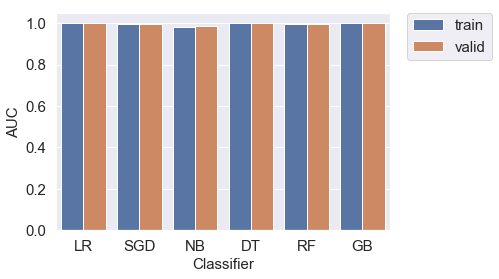

In [68]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [69]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

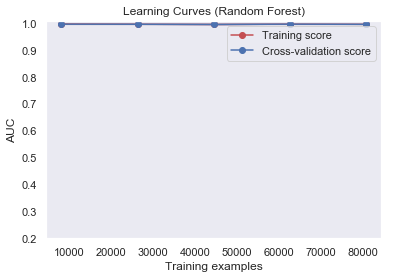

In [70]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

## Model Selection: Feature Importance

In [71]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [72]:
feature_importances.head()

,importance
CLASSIFICATION_TP/DE,7.523848
CLASSIFICATION_TP/LOW,3.208978
CLASSIFICATION_TP/HIGH,1.368217
OWNER_NAME_Senior_Analyst_2,0.274307
Bus_seg_Aviation Services,0.269943


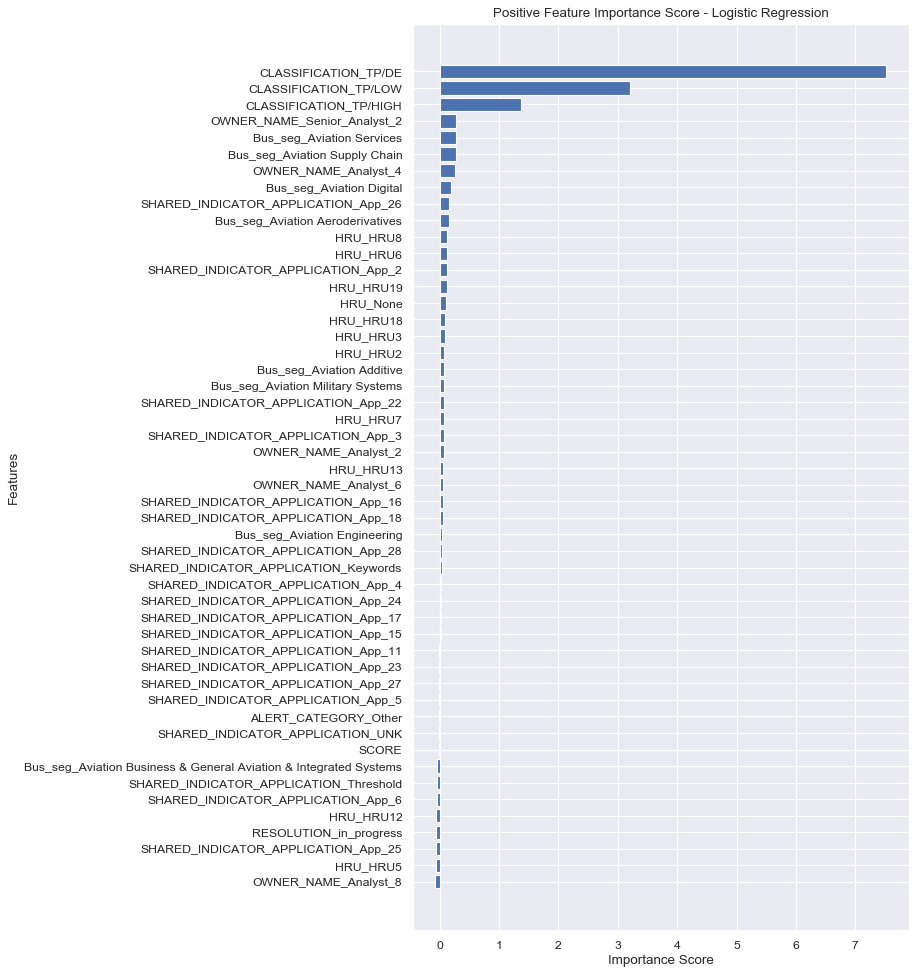

In [73]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

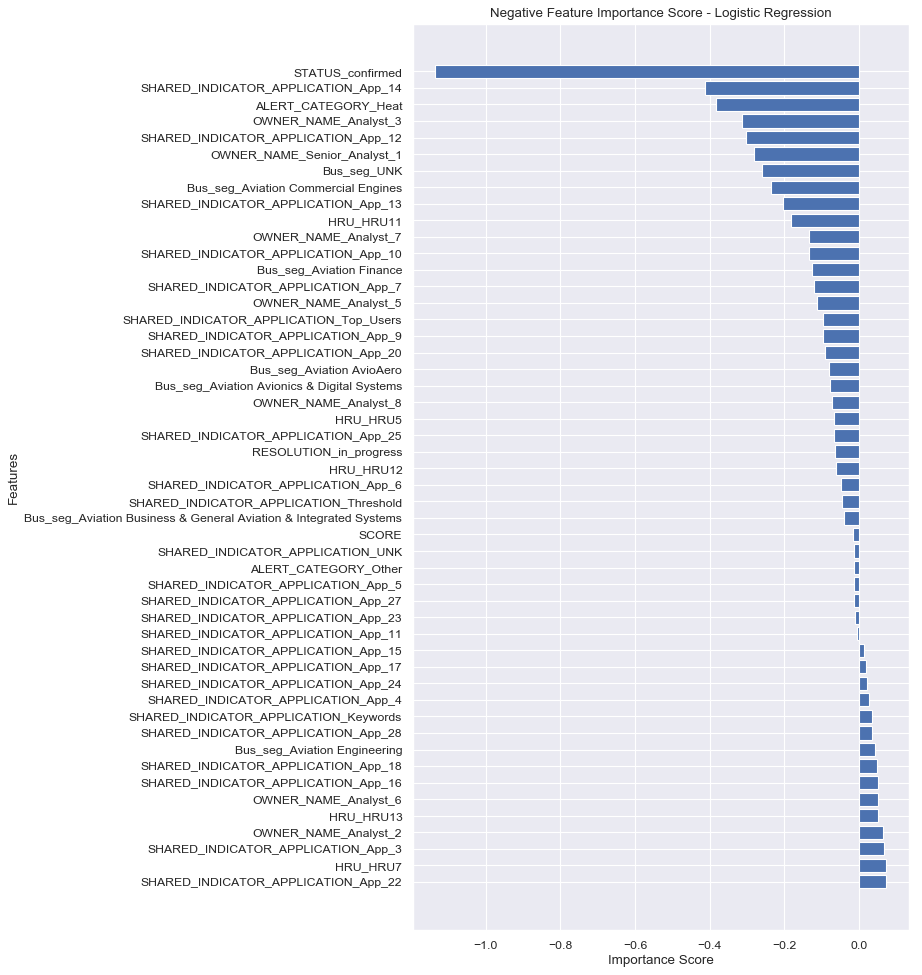

In [74]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()